In [8]:
# this is the notebook for the ASTR-19 group project

In [9]:
#import basics
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import optimize

In [10]:
#Upload text data
#named the text fname, to make calling it easier.
fname = 'ASTR19_S22_group_project_data.txt'
#data = np.genfromtxt(fname, dtype=None) #another variation to call, text, ignore.
data = np.loadtxt(fname,dtype=np.ndarray) #loaded the data as an array, named it data.
print(data)

[['1' '8:07' '6.57']
 ['1' '15:37' '-0.39']
 ['2' '8:55' '5.38']
 ['2' '16:25' '-1.74']
 ['3' '9:45' '5.26']
 ['3' '17:14' '-1.36']
 ['4' '10:35' '4.13']
 ['4' '18:00' '-1.15']
 ['5' '11:28' '3.48']
 ['5' '18:46' '-1.61']
 ['6' '12:22' '2.62']
 ['6' '19:31' '0.05']
 ['7' '13:24' '1.83']
 ['7' '20:16' '1.01']
 ['8' '3:22' '3.57']
 ['8' '21:01' '0.73']
 ['9' '4:07' '4.54']
 ['9' '21:46' '2.17']
 ['10' '4:50' '3.76']
 ['10' '11:58' '2.88']
 ['11' '5:31' '3.90']
 ['11' '12:56' '1.92']
 ['12' '6:08' '4.73']
 ['12' '13:45' '1.74']
 ['13' '6:47' '5.66']
 ['13' '14:25' '0.79']
 ['14' '7:22' '5.33']
 ['14' '15:00' '-0.04']
 ['15' '7:59' '5.23']
 ['15' '15:34' '-1.12']
 ['16' '8:34' '6.67']
 ['16' '16:08' '-0.61']
 ['17' '9:10' '4.74']
 ['17' '16:41' '-0.93']
 ['18' '9:45' '4.69']
 ['18' '17:12' '-1.29']
 ['19' '10:21' '4.20']
 ['19' '17:45' '0.22']
 ['20' '10:57' '3.68']
 ['20' '18:15' '0.26']
 ['21' '11:38' '2.47']
 ['21' '18:48' '0.36']
 ['22' '12:25' '2.59']
 ['22' '19:20' '0.99']
 ['23' '2:

In [11]:
x = []
y = []

for entry in data:
    time = float(entry[1].replace(":", "")) / 2400.0
    date = float(entry[0]) + time
    
    x.append(date)
    y.append(float(entry[2]))

x = np.array(x)
y = np.array(y)

Text(0, 0.5, 'Tide')

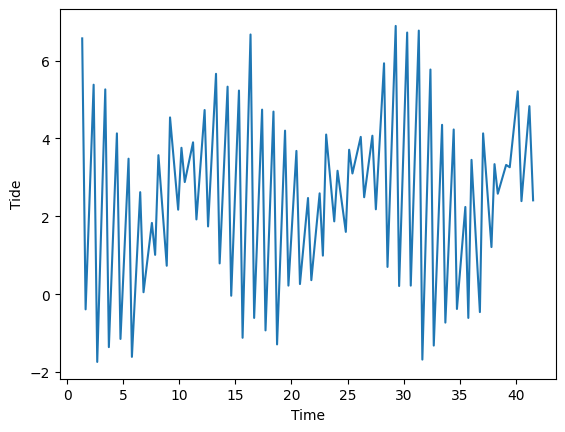

In [12]:
plt.plot(x, y)

plt.xlabel("Time")
plt.ylabel("Tide")

Text(0, 0.5, 'Tide')

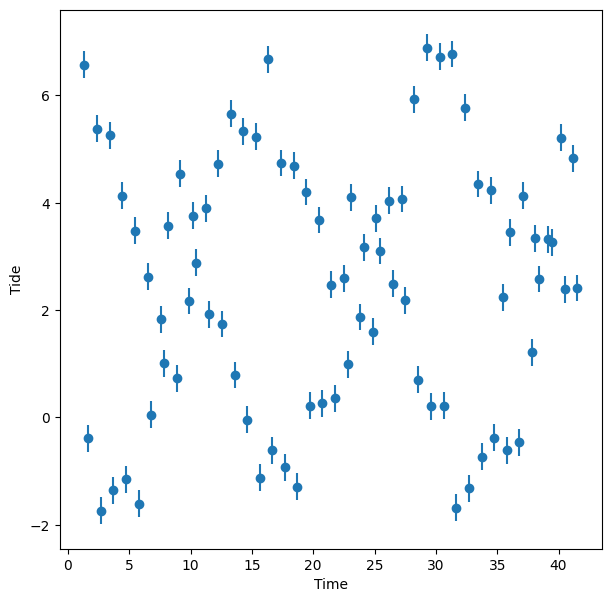

In [13]:
npoints = len(data)

sig = 0.25

y_err = np.full(npoints, sig)

f = plt.figure(figsize=(7, 7))

plt.errorbar(x, y, yerr=y_err, fmt="o")
plt.xlabel("Time")
plt.ylabel("Tide")

0.7408210883823245 29.90106507834284 0.9484978215145892 2.47184454410903


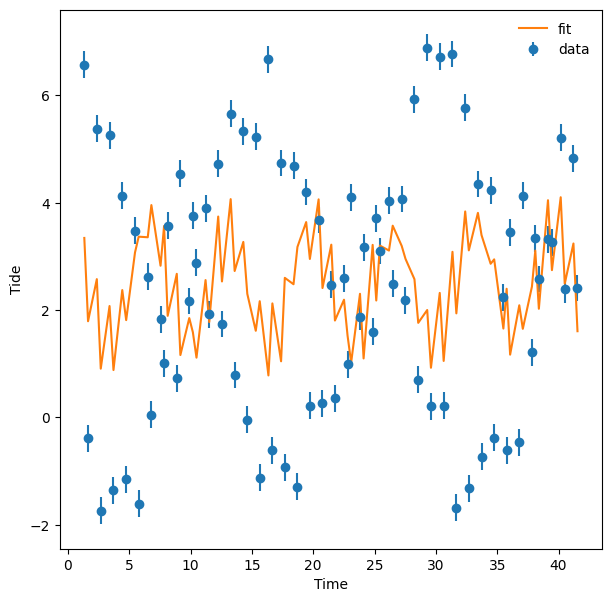

In [14]:
a = 3.0
b = 30.0
c = 1.0
d = 2.0
bounds = ([], [])

def guess(x, a, b, c, d):
    return a * np.sin(b * x) + np.cos(c * x) + d

params, params_cov = optimize.curve_fit(guess, x, y, sigma=y_err, p0=[a, b, c, d], bounds=bounds)

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit, b_fit, c_fit, d_fit)

y_fit = guess(x, a_fit, b_fit, c_fit, d_fit)

f = plt.figure(figsize=(7, 7))

plt.errorbar(x, y, yerr=y_err, fmt="o", label="data")
plt.plot(x, y_fit, label="fit")
#plt.plot(x, guess(x, a, b, c, d), label="fit")
plt.xlabel("Time")
plt.ylabel("Tide")
plt.legend(loc=0, frameon=False)

In [15]:
#3 subtract off the best fit function for residuals
residuals = y - y_fit

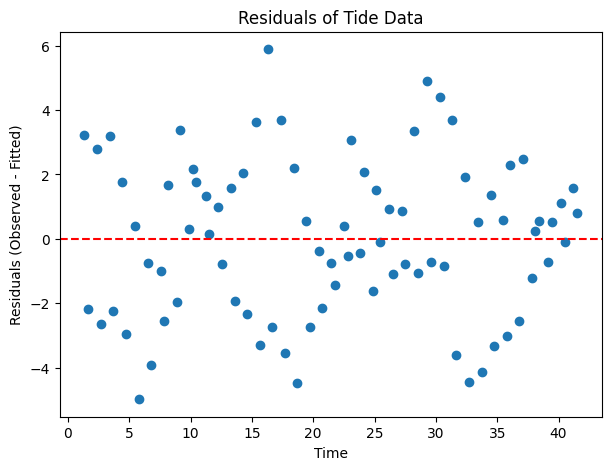

In [16]:
# plot the residuals
plt.figure(figsize=(7, 5))
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Time")
plt.ylabel("Residuals (Observed - Fitted)")
plt.title("Residuals of Tide Data")
plt.show()

In [23]:
# measure standard deviation
std_dev_residuals = np.std(residuals)
print("Standard Deviation of Residuals:", std_dev_residuals)

Standard Deviation of Residuals: 2.4121664396526565


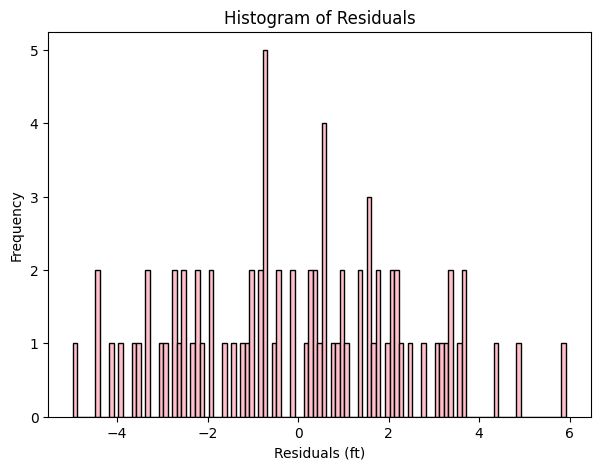

In [34]:
# plot a histogram
plt.figure(figsize=(7, 5))
bin_width = 0.1  # reasonable bin widths
bins = np.arange(min(residuals), max(residuals) + bin_width, bin_width)
plt.hist(residuals, bins=bins, color='pink', edgecolor='black')
plt.xlabel("Residuals (ft)")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.savefig("./histogram.pdf")

In [35]:
!pwd

/Users/madison
